In [1]:
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

## 0 : Abnormal , 1: Normal

In [11]:
train_arff = arff.loadarff(r'E:\glass_git\ML-DL\Signal&Table\data\Wafer_sensor\Wafer_TEST.arff')
test_arff = arff.loadarff(r'E:\glass_git\ML-DL\Signal&Table\data\Wafer_sensor\Wafer_TRAIN.arff')

train_data = pd.DataFrame(train_arff[0])
test_data = pd.DataFrame(test_arff[0])
print(f'train_data : {train_data.shape}, test_data : {test_data.shape}')

train_data['target']=train_data['target'].apply(lambda x: int(x))
test_data['target']=test_data['target'].apply(lambda x: int(x))

train_data['target']=train_data['target'].replace(-1,0)
test_data['target']=test_data['target'].replace(-1,0)

train_data : (6164, 153), test_data : (1000, 153)


In [14]:
train_X=train_data.drop('target',axis=1)
train_Y=train_data['target']
train_x,valid_x,train_y,valid_y=train_test_split(train_X, train_Y, test_size=0.2, random_state=42, stratify=train_Y)

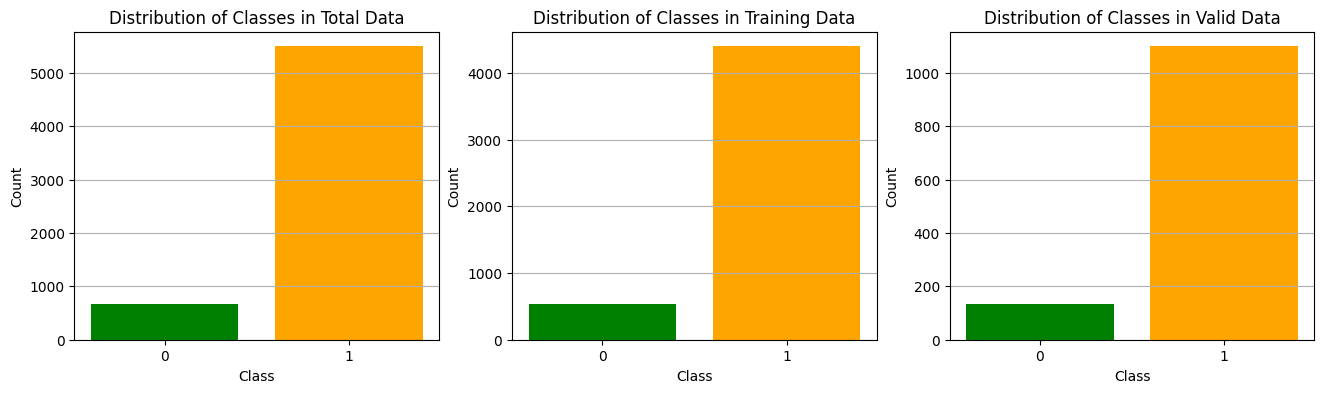

In [17]:
#check data distribution
plt.subplots(1, 3, figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.bar(train_Y.value_counts().index, train_Y.value_counts().values, color=['orange','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Total Data')
plt.xticks(train_Y.value_counts().index)
plt.grid(axis='y')

plt.subplot(1, 3, 2)
plt.bar(train_y.value_counts().index, train_y.value_counts().values, color=['orange','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.xticks(train_y.value_counts().index)
plt.grid(axis='y')

plt.subplot(1, 3, 3)
plt.bar(valid_y.value_counts().index, valid_y.value_counts().values, color=['orange','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Valid Data')
plt.xticks(valid_y.value_counts().index)
plt.grid(axis='y')
plt.show()

In [16]:
train_corr=train_data.corr()
train_corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

In [4]:
train_label=pd.read_csv(r'E:\glass_git\ML-DL\Signal&Table\data\Wafer_sensor\Wafer_TRAIN.txt',header=None)
train_label

,0
0,1.0000000e+00 -1.6022936e+00 -1.6708228e+...
1,1.0000000e+00 1.0845914e+00 1.0845914e+...
2,1.0000000e+00 3.6268855e-01 3.6268855e-...
3,1.0000000e+00 -1.0945235e+00 -1.0945235e+...
4,1.0000000e+00 -1.1037610e+00 -1.1037610e+...
...,...
995,1.0000000e+00 -1.6217092e+00 -1.6442399e+...
996,1.0000000e+00 8.1352008e-01 8.1352008e-...
997,-1.0000000e+00 -8.3288537e-01 -9.7729338e-...
998,1.0000000e+00 9.3038913e-01 9.3038913e-...
